# Set up your notebook

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, auc, confusion_matrix, recall_score, precision_score

import statsmodels.formula.api as smf
%matplotlib inline

# Executive Summary

- Come back to this after your analysis has been completed.

In [ ]:
# Conclusion from analysis was that the stock price performance of Apple, Facebook, and Google 
# has an even smaller impact on the odds that the S&P 500 price index has gone up from the previous day's S&P 500 Price
# when compared to the number of Motley Fool Articles published on the topic of the "S&P 500" on that day.

# Second conclusion: the price of Facebook is more strongly correlated with the S&P 500 as compared to Google and Apple.

# Problem Statement

## What are you trying to find out?

- Write a well-formed problem statement, with reference to the SMART guideline. Remember that not all of the letters may apply in all cases, it is just a guideline you can follow.


In [ ]:
# 1: Does the number of articles about the "S&P500" on www.fool.com, an investment website, affect the S&P500 price?
# 2: Does the stock prices of Google, Facebook and Amazon affect the S&P500 Index price? 

# Notes: The S&P 500 Index is a number which is a "weighted average" price of the 500 largest companies in the US.

## What is your dataset about?

In [ ]:
# First, we will run a BeautifulSoup script to extract the dataset from the investment website www.fool.com

In [290]:
from html.parser import HTMLParser
import requests
from bs4 import BeautifulSoup
from datetime import datetime
from xlwt import Workbook

url = "http://www.fool.com/search/solr.aspx?q=S%26P+500&dataSource=article&handleSearch=true"

def crawler():
    wb = Workbook()
   
    
    # making the sheet
    sheet = wb.add_sheet('Fool')
    sheet.col(0).width = 10000
    sheet.col(1).width = 3000
    sheet.col(2).width = 12000
    sheet.col(3).width = 5000

    source_code = requests.get(url)
    plain_text = source_code.text
    soup = BeautifulSoup(plain_text, "html.parser")
    total_page = int(soup.find('span', {'id': 'totalCount'}).text.replace(",", "")[:-2])
    print(total_page)
    i = 1
    j = 1
    sheet.write(0, 0, "Url")
    sheet.write(0, 1, "Date")
    sheet.write(0, 2, "Text")
    sheet.write(0, 3, "Title")
    
    # main extracting code 
    while i <= total_page:
        urls = "http://www.fool.com/search/solr.aspx?dataSource=article&handleSearch=true&page={}&q=S%26P+500&source=isesitbut0000001".format(
            i)
        print(urls)
        if j > 500:           #code to just get max 500 values 
            break
        source_code = requests.get(urls)
        plain_text = source_code.text
        soup = BeautifulSoup(plain_text, "html.parser")
        divs = soup.findAll('dl', {'class': 'results'})
        for div in divs:
            # href = link.get('href')
            titles = div.findAll('a', attrs={"title": "Go to this article"})
            bodys = div.findAll('dd')
            dates = div.findAll('span', {'class': 'date'})

            body = [b for b in bodys if b.text.startswith("...")]
            for index in range(len(titles)):
                if j > 500:
                    break
                date = dates[index].text.replace(",", "")
                date = datetime.strptime(date, "%B %d %Y").date()
                first_date = datetime.strptime("June 1 2015", "%B %d %Y").date()
                last_date = datetime.strptime("June 1 2017", "%B %d %Y").date()
                # print(type(first_date))
                if ("S&P 500" in body[index].text.replace(";", "") or "S&P 500" in titles[index].text.replace(";",
                                                                                                              "")) and (
                                first_date < date < last_date):
                    link = titles[index].get('href')
                    print("Yes")
                    source_code = requests.get(link)
                    plain_text = source_code.text
                    soup = BeautifulSoup(plain_text, "html.parser")
                    content = soup.find('span', {'class': 'article-content'})
                    # print(content.text)
                    n = link.find('aspx') + 4
                    link = link[0:n]
                    sheet.write(j, 0, link)
                    sheet.write(j, 1, str(date))
                    if content:
                        sheet.write(j, 2, str(content.text))
                    else:
                        sheet.write(j, 2, "")
                    sheet.write(j, 3, str(titles[index].text))
                    j += 1
        i += 1
    wb.save('motleyfool_webscrape.xls')


if __name__ == "__main__":
    crawler()
    print("Finished")


40496
http://www.fool.com/search/solr.aspx?dataSource=article&handleSearch=true&page=1&q=S%26P+500&source=isesitbut0000001
Yes
Yes
Yes
http://www.fool.com/search/solr.aspx?dataSource=article&handleSearch=true&page=2&q=S%26P+500&source=isesitbut0000001
Yes
Yes
Yes
Yes
Yes
Yes
http://www.fool.com/search/solr.aspx?dataSource=article&handleSearch=true&page=3&q=S%26P+500&source=isesitbut0000001
Yes
Yes
http://www.fool.com/search/solr.aspx?dataSource=article&handleSearch=true&page=4&q=S%26P+500&source=isesitbut0000001
Yes
Yes
http://www.fool.com/search/solr.aspx?dataSource=article&handleSearch=true&page=5&q=S%26P+500&source=isesitbut0000001
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
http://www.fool.com/search/solr.aspx?dataSource=article&handleSearch=true&page=6&q=S%26P+500&source=isesitbut0000001
Yes
Yes
Yes
Yes
Yes
http://www.fool.com/search/solr.aspx?dataSource=article&handleSearch=true&page=7&q=S%26P+500&source=isesitbut0000001
Yes
Yes
http://www.fool.com/search/solr.aspx?dataSource=article&handleS

http://www.fool.com/search/solr.aspx?dataSource=article&handleSearch=true&page=69&q=S%26P+500&source=isesitbut0000001
http://www.fool.com/search/solr.aspx?dataSource=article&handleSearch=true&page=70&q=S%26P+500&source=isesitbut0000001
http://www.fool.com/search/solr.aspx?dataSource=article&handleSearch=true&page=71&q=S%26P+500&source=isesitbut0000001
http://www.fool.com/search/solr.aspx?dataSource=article&handleSearch=true&page=72&q=S%26P+500&source=isesitbut0000001
http://www.fool.com/search/solr.aspx?dataSource=article&handleSearch=true&page=73&q=S%26P+500&source=isesitbut0000001
http://www.fool.com/search/solr.aspx?dataSource=article&handleSearch=true&page=74&q=S%26P+500&source=isesitbut0000001
http://www.fool.com/search/solr.aspx?dataSource=article&handleSearch=true&page=75&q=S%26P+500&source=isesitbut0000001
http://www.fool.com/search/solr.aspx?dataSource=article&handleSearch=true&page=76&q=S%26P+500&source=isesitbut0000001
http://www.fool.com/search/solr.aspx?dataSource=article&

http://www.fool.com/search/solr.aspx?dataSource=article&handleSearch=true&page=138&q=S%26P+500&source=isesitbut0000001
http://www.fool.com/search/solr.aspx?dataSource=article&handleSearch=true&page=139&q=S%26P+500&source=isesitbut0000001
http://www.fool.com/search/solr.aspx?dataSource=article&handleSearch=true&page=140&q=S%26P+500&source=isesitbut0000001
http://www.fool.com/search/solr.aspx?dataSource=article&handleSearch=true&page=141&q=S%26P+500&source=isesitbut0000001
http://www.fool.com/search/solr.aspx?dataSource=article&handleSearch=true&page=142&q=S%26P+500&source=isesitbut0000001
http://www.fool.com/search/solr.aspx?dataSource=article&handleSearch=true&page=143&q=S%26P+500&source=isesitbut0000001
Yes
http://www.fool.com/search/solr.aspx?dataSource=article&handleSearch=true&page=144&q=S%26P+500&source=isesitbut0000001
Yes
http://www.fool.com/search/solr.aspx?dataSource=article&handleSearch=true&page=145&q=S%26P+500&source=isesitbut0000001
http://www.fool.com/search/solr.aspx?dat

http://www.fool.com/search/solr.aspx?dataSource=article&handleSearch=true&page=206&q=S%26P+500&source=isesitbut0000001
Yes
http://www.fool.com/search/solr.aspx?dataSource=article&handleSearch=true&page=207&q=S%26P+500&source=isesitbut0000001
Yes
http://www.fool.com/search/solr.aspx?dataSource=article&handleSearch=true&page=208&q=S%26P+500&source=isesitbut0000001
Yes
Yes
http://www.fool.com/search/solr.aspx?dataSource=article&handleSearch=true&page=209&q=S%26P+500&source=isesitbut0000001
Yes
Yes
Yes
http://www.fool.com/search/solr.aspx?dataSource=article&handleSearch=true&page=210&q=S%26P+500&source=isesitbut0000001
Yes
http://www.fool.com/search/solr.aspx?dataSource=article&handleSearch=true&page=211&q=S%26P+500&source=isesitbut0000001
Yes
http://www.fool.com/search/solr.aspx?dataSource=article&handleSearch=true&page=212&q=S%26P+500&source=isesitbut0000001
Yes
Yes
Yes
Yes
http://www.fool.com/search/solr.aspx?dataSource=article&handleSearch=true&page=213&q=S%26P+500&source=isesitbut0000

Describe the dataset in words (you could write a short paragraph, describe the columns, create a data dictionary, etc. but do not include descriptive statistics here)

In [574]:
# First Dataset: It is the S&P 500 articles written from www.fool.com for each date, from 1 June 2015 to 1 June 2017

In [498]:
motleyfool_data = pd.read_csv('save_Projectdssg04_new.csv', encoding='latin1', skipinitialspace=True) 

In [499]:
motleyfool_data.head()

,Url,Date,Text,Title
0,http://www.fool.com/knowledge-center/what-is-t...,2016-06-22,\n\nImage source: Getty Images.\nThe S&P 500 i...,What Is the S&P; 500?
1,http://www.fool.com/knowledge-center/what-is-t...,2016-06-22,\n\nImage source: Getty Images.\nThe S&P 500 i...,What Is the S&P; 500?
2,http://www.fool.com/retirement/2017/05/10/the-...,2017-05-10,\nIf you want your portfolio to grow with Amer...,The 3 Best S&P; 500 Index Funds
3,http://www.fool.com/retirement/2017/01/01/the-...,2017-01-01,\nThe S&P 500 (SNPINDEX:^GSPC) had a strong pe...,The S&P; 500's Worst Day in 2016
4,http://www.fool.com/investing/2016/12/30/the-s...,2016-12-30,\nThe S&P 500 (SNPINDEX:^GSPC) did well in 201...,The S&P; 500's Best Day in 2016


In [500]:
# Each row in the dataset represents one article, with the information on its Date, the article text, and the title.  

In [501]:
motleyfool_dateonly = pd.DataFrame(motleyfool_data["Date"])

In [502]:
motleyfool_dateonly['motleyfool_articles'] = motleyfool_data.groupby('Date')['Date'].transform('count')

In [503]:
motleyfool_dateonly = motleyfool_dateonly.sort_values("Date", ascending=False)

In [504]:
motleyfool_dateonly = motleyfool_dateonly.drop_duplicates(['Date'])

In [505]:
motleyfool_dateonly['Date'] =  pd.to_datetime(motleyfool_dateonly['Date'], format='%Y/%m/%d')

In [506]:
motleyfool_dateonly.head()

,Date,motleyfool_articles
135,2017-05-31,16
87,2017-05-30,19
197,2017-05-29,9
114,2017-05-28,6
213,2017-05-27,16


In [507]:
# The formatted dataset from www.fool.com contains only the number of articles mentioning "S&P 500" for each date. 

Second Dataset: the S&P500 Index Price download

In [508]:
SP500_price = pd.read_csv("SP500_price.csv", sep = ",")

In [509]:
SP500_price.columns = ['Date', 'SP500', 'Change']

In [510]:
SP500_price['Date'] =  pd.to_datetime(SP500_price['Date'], format='%d/%m/%Y')

In [575]:
SP500_price.head()

,Date,SP500,Change
0,2017-06-01,2430.06,Up
1,2017-05-31,2411.80,Down
2,2017-05-30,2412.91,Down
3,2017-05-26,2415.82,Up
4,2017-05-25,2415.07,Up


In [ ]:
# The dataset contains the prices of the S&P 500 for each date, and the change in the price from the previous day, up (increase) or down (decrease from previous day's closing price). 

Third Dataset: Stock prices of Facebook, Apple and Google

In [512]:
aapl_fb_goog_prices = pd.read_csv("aapl_fb_goog_prices.csv", sep = ",")

In [513]:
aapl_fb_goog_prices['Date'] =  pd.to_datetime(aapl_fb_goog_prices['Date'], format='%d/%m/%Y')

In [576]:
aapl_fb_goog_prices.head()

,Date,FB,AAPL,GOOG
0,2017-06-01,151.53,153.18,966.95
1,2017-05-31,151.46,152.76,964.86
2,2017-05-30,152.38,153.67,975.88
3,2017-05-26,152.13,153.61,971.47
4,2017-05-25,151.96,153.87,969.54


In [ ]:
# Dataset is prices of Google, Apple and Facebook for each date

## Risks and Assumptions

Our asumption is that www.fool.com, an investment website, is broadly representative, and also widely visited, by investors. Our assumption is also that investors MAY base their investment decisions on the S&P 500 index, whenever there is a mention of the S&P 500 on an article the website and they read it. 

## Hypothesis

In [577]:
# Null hypothesis, $H_0$: Part 1: The investment articles on www.fool.com which mention the S&P 500 Index,
# whenever they are published, have no bearing on whether the S&P 500 Index price goes up, on the same day.  
#Part 2: The stock prices of Facebook, Google, and Apply have no bearing on the S&P 500 Price.   

# Alternative hypothesis, $H_1$: Part 1: The investment articles on www.fool.com which mention the S&P 500 Index, 
# whenever they are published, actually cause the S&P 500 Index price to go up, on the same day. 
# Part 2: The stock prices of Facebook, Google, and Apple directly affect positively the S&P 500 Price.

## Success Metrics

In [578]:
# Either proving or disproving the null hypothesis is useful information, 
# as it can tell us whether the publication of articles on investment websites on an investment topic
# of which an example is the "S&P 500" Index, can influence the price of the index. 

# Exploratory Data Analysis

- Include visualizations, descriptive statistics, etc.

In [515]:
combined_table = pd.merge(SP500_price, motleyfool_dateonly, on='Date')
combined_table.head()

,Date,SP500,Change,motleyfool_articles
0,2017-05-31,2411.80,Down,16
1,2017-05-30,2412.91,Down,19
2,2017-05-26,2415.82,Up,26
3,2017-05-25,2415.07,Up,16
4,2017-05-24,2404.39,Up,32


In [516]:
combined_table = pd.merge(combined_table, aapl_fb_goog_prices, on='Date')

combined_table.head()

,Date,SP500,Change,motleyfool_articles,FB,AAPL,GOOG
0,2017-05-31,2411.80,Down,16,151.46,152.76,964.86
1,2017-05-30,2412.91,Down,19,152.38,153.67,975.88
2,2017-05-26,2415.82,Up,26,152.13,153.61,971.47
3,2017-05-25,2415.07,Up,16,151.96,153.87,969.54
4,2017-05-24,2404.39,Up,32,150.04,153.34,954.96


In [517]:
combined_table.describe()

,SP500,motleyfool_articles,FB,AAPL,GOOG
count,90.000000,90.000000,90.000000,90.000000,90.000000
mean,2229.174111,4.533333,128.315889,127.560667,808.075222
std,172.061159,6.019071,20.061541,20.841900,98.326689
min,1851.860000,1.000000,89.430000,90.340000,614.340000
25%,2078.407500,1.000000,112.452500,110.242500,739.340000
50%,2313.185000,1.000000,132.210000,132.295000,816.705000
75%,2384.995000,7.000000,147.385000,144.427500,898.032500
max,2415.820000,32.000000,152.780000,156.100000,975.880000


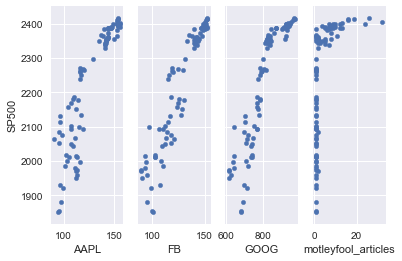

In [521]:
# Below is to visualize the relationship between the features and the S&P500 Price using scatterplots
fig, axs = plt.subplots(1, 4, sharey=True)
combined_table.plot(kind='scatter', x='AAPL', y='SP500', ax=axs[0])
combined_table.plot(kind='scatter', x='FB', y='SP500', ax=axs[1])
combined_table.plot(kind='scatter', x='GOOG', y='SP500', ax=axs[2])
combined_table.plot(kind='scatter', x='motleyfool_articles', y='SP500', ax=axs[3])

In [522]:
# There is positive correlation between the prices of Apple, Facebook, Google with the S&P500. 
# Above the number of articles of 1, u.e. from 2 to 30, there is a positive correlation between number of articles and S&P500.

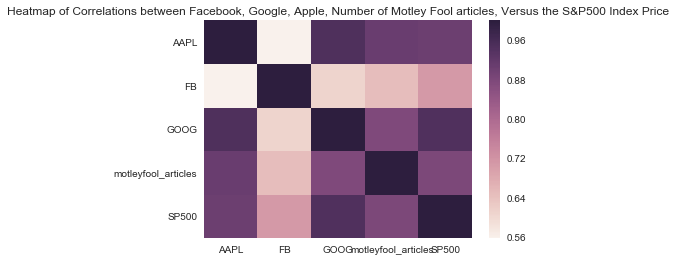

In [523]:
plt.figure()
labels = ["AAPL", "FB", "GOOG", "motleyfool_articles", "SP500"]
sns.heatmap(combined_table.corr(), xticklabels=labels, yticklabels=labels)
plt.title("Heatmap of Correlations between Facebook, Google, Apple, Number of Motley Fool articles, Versus the S&P500 Index Price")
plt.show()

In [524]:
# From the heatmap it can be seen that to the S&P500, Google's price has the strongest correlation, followed by APPL,
# then followed by the number of Motley Fool Investment website articles on that day, and lastly, by Facebook's price.

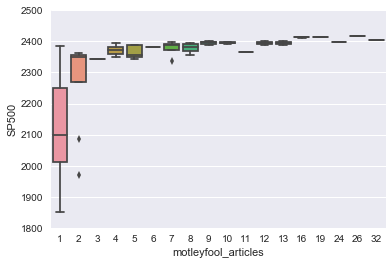

In [525]:
sns.boxplot("motleyfool_articles", "SP500", data=combined_table)
plt.ylim(1800,2500)
plt.show()

In [526]:
# When the number of articles written on the Motley Fool investment website is high, the S&P500 price is high as well.

# Data Cleaning

- Prepare your dataset for modeling

In [527]:
combined_table.count()

Date                   90
SP500                  90
Change                 90
motleyfool_articles    90
FB                     90
AAPL                   90
GOOG                   90
dtype: int64

In [528]:
# There are no missing values as the datasets had been merged based on a common key "Date", and all the prices are available for the matched dates.

# Modeling

- Run a classification model (or a few, if you like)
- How do you know how well your model is doing?

First Model 

In [550]:
# create a fitted model in one line
lm = smf.ols(formula='SP500 ~ AAPL + FB + GOOG + motleyfool_articles', data=combined_table).fit()

# Below we print the coefficients
lm.params

Intercept              1086.942954
AAPL                      3.129734
FB                        5.627579
GOOG                      0.042747
motleyfool_articles      -3.011056
dtype: float64

In [530]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  SP500   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     276.2
Date:                Wed, 02 Aug 2017   Prob (F-statistic):           7.98e-48
Time:                        03:03:03   Log-Likelihood:                -471.76
No. Observations:                  90   AIC:                             953.5
Df Residuals:                      85   BIC:                             966.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1086.9430     63.515     17.113      0.000     960.657    1213.228
AAPL                    3.1297      0.532      5.887      0.000       2.073       4.187
FB                      5.6276      0.837      6.723      0.000       3.963       7.292
GOOG                    0.0427      0.187      0.229      0.820      -0.329       0.414
motleyfool_articles    -3.0111      1.239     -2.430      0.017      -5.475      -0.547
==============================================================================
Omnibus:                        5.271   Durbin-Watson:                   0.374
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                5.197
Skew:                           0.356   Prob(JB):                       0.0744
Kurtosis:                       3.937   Cond. No.                     1.07e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Second Model 

In [552]:
# The Change column represents whether the S&P 500 went up or down from the previous day. 
# However, to do a logistic regression, it may be ncessary to use the binary values of 0 and 1
# Hence, "Up" will be changed to 1, and "Down" to 0 in a new column "change_binary"

In [ ]:
combined_table['change_binary'] = np.where(combined_table['Change']=='Up', '1', '0') 

In [532]:
combined_table.head()

,Date,SP500,Change,motleyfool_articles,FB,AAPL,GOOG,change_binary
0,2017-05-31,2411.80,Down,16,151.46,152.76,964.86,0
1,2017-05-30,2412.91,Down,19,152.38,153.67,975.88,0
2,2017-05-26,2415.82,Up,26,152.13,153.61,971.47,1
3,2017-05-25,2415.07,Up,16,151.96,153.87,969.54,1
4,2017-05-24,2404.39,Up,32,150.04,153.34,954.96,1


In [558]:
lm2 = LogisticRegression().fit(combined_table[["motleyfool_articles"]], combined_table["change_binary"])

In [534]:
print(lm2.coef_)
print(lm2.intercept_)

[[ 0.04706341]]
[ 0.01686923]


In [571]:
accuracy_score(combined_table["change_binary"], lm2.predict(combined_table[["motleyfool_articles"]])) 

0.55555555555555558

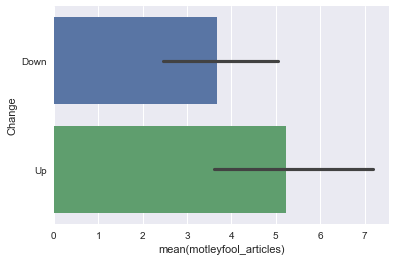

In [572]:
sns.barplot("motleyfool_articles", "Change", data=combined_table)

Third Model 

In [536]:
techstock_factors = ["AAPL", "GOOG", "FB"]

In [537]:
lm3 = LogisticRegression().fit(combined_table[techstock_factors], combined_table["change_binary"])

In [538]:
print(lm3.coef_)
print(lm3.intercept_)

[[ 0.00607044 -0.00083006  0.00098098]]
[-0.00027928]


In [539]:
accuracy_score(combined_table[["change_binary"]], lm3.predict(combined_table[techstock_factors])) 

0.55555555555555558

# What does your analysis show?

- What are your findings (in relation to your problem statement)?

First Model

In [ ]:
#AAPL                      3.129734
#FB                        5.627579
#GOOG                      0.042747
#motleyfool_articles      -3.011056

In [547]:
# The co-efficient of AAPL is 3.129, meaning an increase in AAPL of 1, correponds to an increase of 3.129 in the S&P500.

In [548]:
# The highest correlation is with Facebook, where an increase in FB of 1, correponds to an increase of 5.628 in S&P500.

In [549]:
# Google has the lowest correlation

In [ ]:
# The number of Motley Fool articles 

Second Model 

In [573]:
# The coefficient is: 0.04706341. 
# A small co-efficient of 0.047 indicate that more Motley Fool Articles written on the topic of the "S&P 500" 
# has a small effect on the odds of the S&P500 having an "Up" from the previous day. 

In [ ]:
# From the bar plot it shows that when the S&P 500 Index has gone Up from the previous day, there are more articles 
# written in the Motley Fool website (mean of 5), compared to when the Index had gone down (mean 3.5 articles).

Third Model 

In [ ]:
# [[ 0.00607044 -0.00083006  0.00098098]]

In [ ]:
# The co-efficients of Apple, Google and Facebook are very small, all lower than 0.047 from above Second Model.

In [565]:
# This indicates that the stock price performance of AAPL, Google and FB has an even smaller impact on the odds 
# that the S&P 500 has an "Up" move from the previous day's price, compared to the number of Motley Fool Articles. 